In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ignoring warnings
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("D:\Data Analytics\Intern\Feynn Labs\data\State wise details EV and Total vehicles.csv")

In [4]:
df.head()

,Sl. No,State/UT,Till date State wise - Total Number of Vehicles Registered,Till date State wise - Total Vehicle Registered as Electric,Proportion of Electric Vehicle,No. of Operational Public Charging Stations,No. of Electric Vehicle (EV) Chargers Sanctioned
0,1,Andaman and Nicobar Island,160375,186,0.12,3,10
1,2,Andhra Pradesh,16517516,66500,0.40,222,266
2,3,Arunachal Pradesh,299371,25,0.01,9,0
3,4,Assam,5393542,116605,2.16,48,20
4,5,Bihar,11728184,155457,1.33,83,37


In [5]:
df.tail()

,Sl. No,State/UT,Till date State wise - Total Number of Vehicles Registered,Till date State wise - Total Vehicle Registered as Electric,Proportion of Electric Vehicle,No. of Operational Public Charging Stations,No. of Electric Vehicle (EV) Chargers Sanctioned
30,31,Dadra and Nagar Haveli and Daman and Diu,372133,345,0.09,1,0
31,32,Uttarakhand,3626246,48250,1.33,406,207
32,33,Uttar Pradesh,43943230,556629,1.27,48,10
33,34,West Bengal,15020616,67111,0.45,189,141
34,Grand Total,Grand Total,340008524,2744019,0.81,6586,2877


In [6]:
#droping the last column
df=df.drop(df.index[-1])

### Exploring the Data

In [7]:
# checking for null values
df.isnull().sum()

Sl. No                                                         0
State/UT                                                       0
Till date State wise - Total Number of Vehicles Registered     0
Till date State wise - Total Vehicle Registered as Electric    0
Proportion of Electric Vehicle                                 0
No. of Operational Public Charging Stations                    0
No. of Electric Vehicle (EV) Chargers Sanctioned               0
dtype: int64

In [8]:
df.info() # getting information on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Sl. No                                                       34 non-null     object 
 1   State/UT                                                     34 non-null     object 
 2   Till date State wise - Total Number of Vehicles Registered   34 non-null     int64  
 3   Till date State wise - Total Vehicle Registered as Electric  34 non-null     int64  
 4   Proportion of Electric Vehicle                               34 non-null     float64
 5   No. of Operational Public Charging Stations                  34 non-null     int64  
 6   No. of Electric Vehicle (EV) Chargers Sanctioned             34 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.0+ KB


In [9]:
print(df.columns) #print the column names

Index(['Sl. No', 'State/UT',
       'Till date State wise - Total Number of Vehicles Registered',
       'Till date State wise - Total Vehicle Registered as Electric',
       'Proportion of Electric Vehicle',
       'No. of Operational Public Charging Stations',
       'No. of Electric Vehicle (EV) Chargers Sanctioned'],
      dtype='object')


In [10]:
df.shape # getting the dimension

(34, 7)

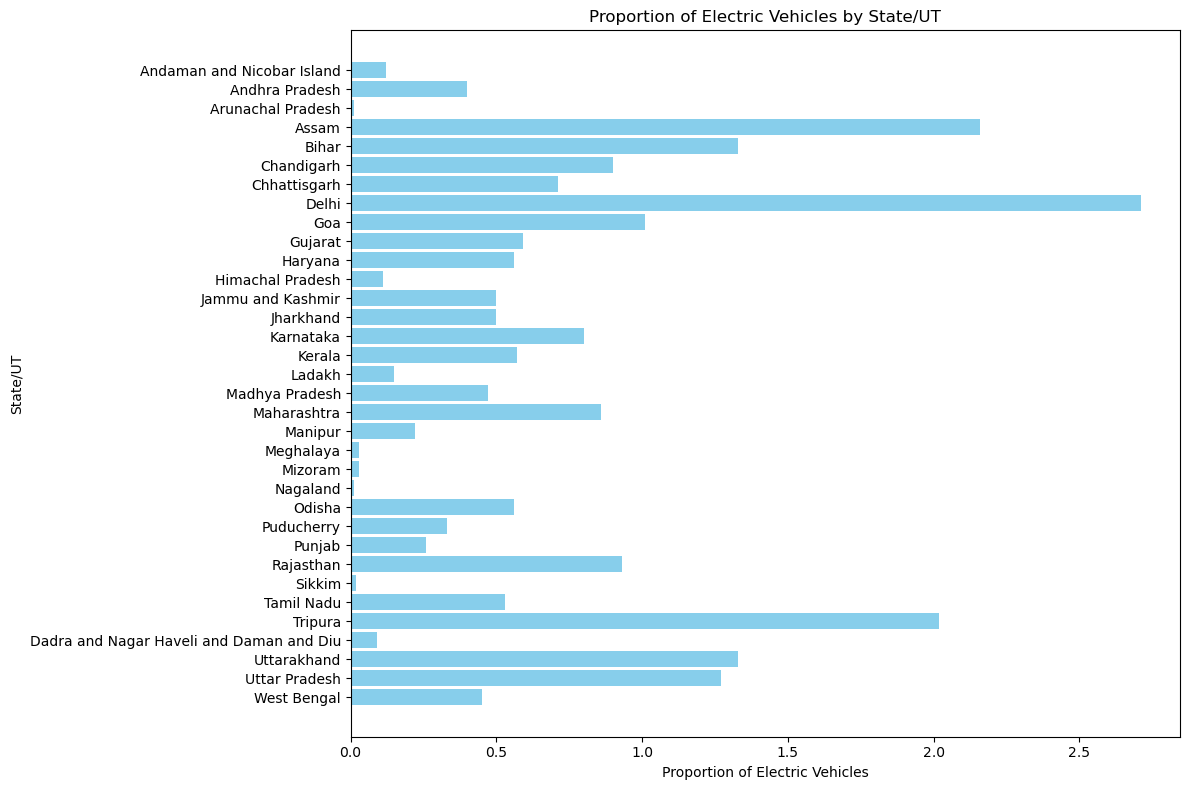

In [11]:
# Plotting a bar chart

plt.figure(figsize=(12, 8))
plt.barh(df["State/UT"], df["Proportion of Electric Vehicle"], color='skyblue')
plt.xlabel('Proportion of Electric Vehicles')
plt.ylabel('State/UT')
plt.title('Proportion of Electric Vehicles by State/UT')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest proportion at the top
plt.tight_layout()
plt.show()

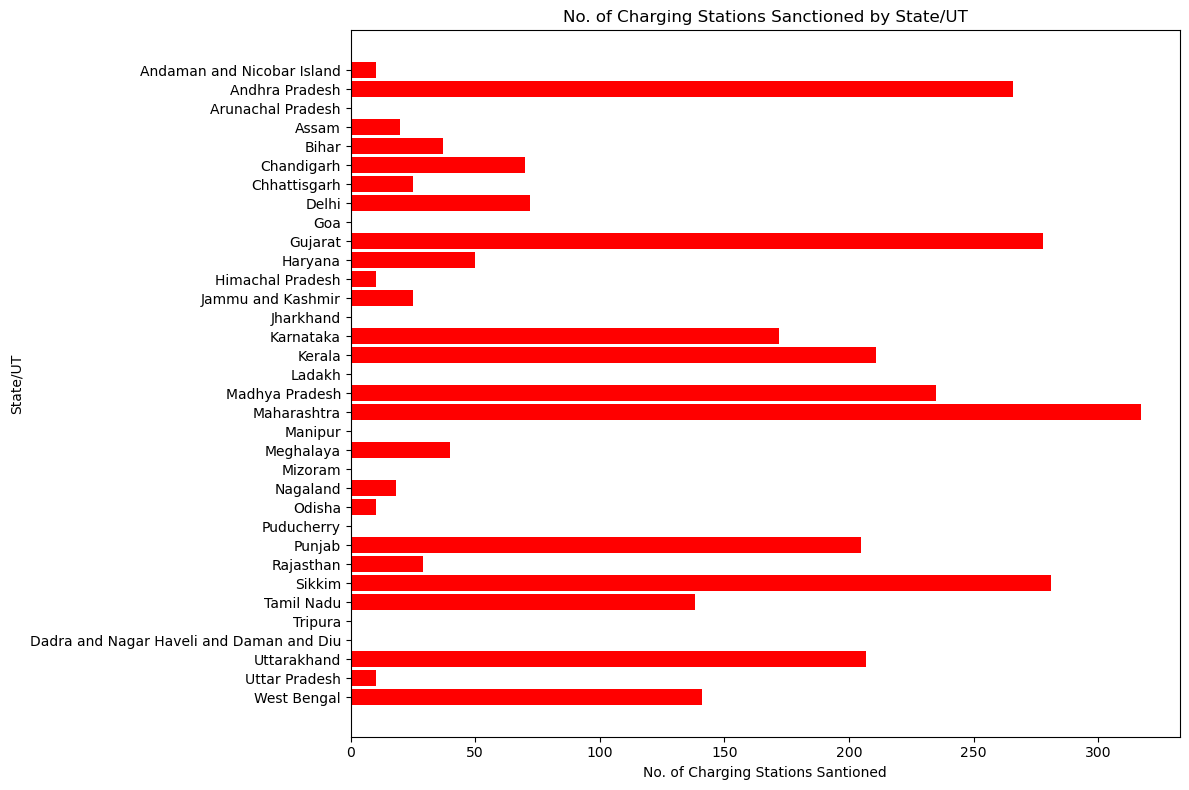

In [12]:
plt.figure(figsize=(12, 8))
plt.barh(df["State/UT"], df["No. of Electric Vehicle (EV) Chargers Sanctioned"], color='red')
plt.xlabel('No. of Charging Stations Santioned')
plt.ylabel('State/UT')
plt.title('No. of Charging Stations Sanctioned by State/UT')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

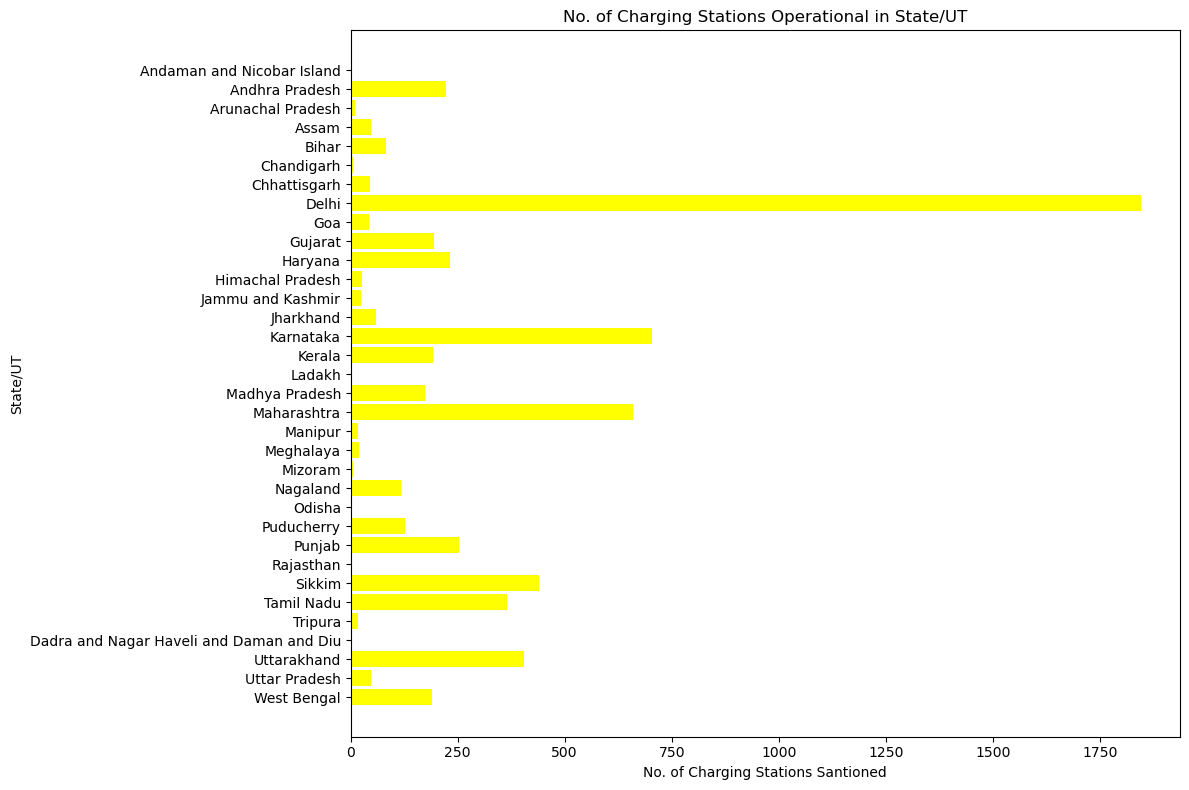

In [13]:
plt.figure(figsize=(12, 8))
plt.barh(df["State/UT"], df["No. of Operational Public Charging Stations"], color='yellow')
plt.xlabel('No. of Charging Stations Santioned')
plt.ylabel('State/UT')
plt.title('No. of Charging Stations Operational in State/UT')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

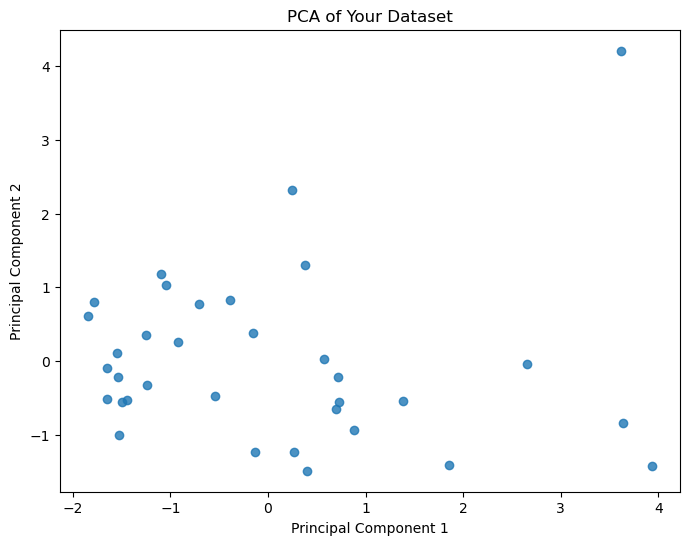

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Separate features (X) and target variable (y) if applicable
X = df.drop(columns=['State/UT'])  
y = df['State/UT']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Visualize the results or further analyze the transformed data
# For example, you can create a scatter plot of the principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Your Dataset')
plt.show()


### Extracting Segments

In [15]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

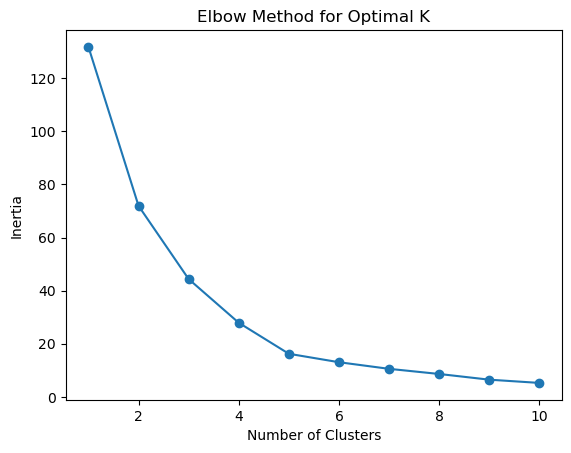

In [16]:
# Perform K-Means clustering with a range of cluster numbers
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to identify the optimal number of clusters using the elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [17]:
# Based on the elbow plot, we chose the no. of clusters to be five.
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)
df['Cluster'] = kmeans.labels_

# Describe each cluster
for cluster_id in range(5):
    print(f"Cluster {cluster_id}:")
    cluster_data = df[df['Cluster'] == cluster_id]
    states = cluster_data['State/UT'].tolist()
    print(f"States/UTs: {', '.join(states)}")
    print(f"Average Proportion of Electric Vehicle: {cluster_data['Proportion of Electric Vehicle'].mean():.2f}")
    print(f"Average No. of Operational Public Charging Stations: {cluster_data['No. of Operational Public Charging Stations'].mean():.0f}")
    print(f"Average No. of Electric Vehicle (EV) Chargers Sanctioned: {cluster_data['No. of Electric Vehicle (EV) Chargers Sanctioned'].mean():.0f}")
    print()

Cluster 0:
States/UTs: Delhi
Average Proportion of Electric Vehicle: 2.71
Average No. of Operational Public Charging Stations: 1845
Average No. of Electric Vehicle (EV) Chargers Sanctioned: 72

Cluster 1:
States/UTs: Andaman and Nicobar Island, Arunachal Pradesh, Himachal Pradesh, Jammu and Kashmir, Jharkhand, Ladakh, Manipur, Meghalaya, Mizoram, Nagaland, Odisha, Puducherry, Dadra and Nagar Haveli and Daman and Diu
Average Proportion of Electric Vehicle: 0.20
Average No. of Operational Public Charging Stations: 32
Average No. of Electric Vehicle (EV) Chargers Sanctioned: 9

Cluster 2:
States/UTs: Andhra Pradesh, Gujarat, Kerala, Madhya Pradesh, Punjab, Rajasthan, Sikkim, Tamil Nadu, Uttarakhand, West Bengal
Average Proportion of Electric Vehicle: 0.56
Average No. of Operational Public Charging Stations: 244
Average No. of Electric Vehicle (EV) Chargers Sanctioned: 199

Cluster 3:
States/UTs: Karnataka, Maharashtra, Uttar Pradesh
Average Proportion of Electric Vehicle: 0.98
Average No.

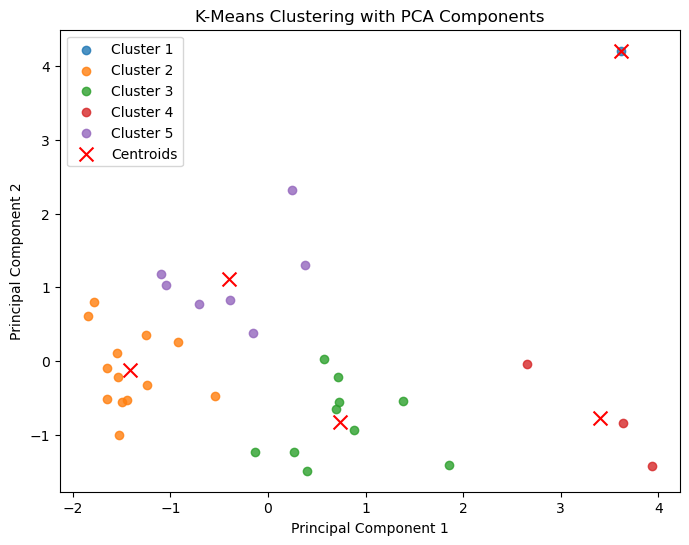

In [19]:
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4','Cluster 5']

# Visualize the clustering results with labeled clusters
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=cluster_labels[i], alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA Components')
plt.legend()
plt.show()

In [21]:
cluster = kmeans.fit_predict(X_pca)
df['cluster'] = cluster

In [22]:
from collections import Counter
counter = Counter(kmeans.labels_)
counter

Counter({1: 13, 2: 10, 4: 7, 3: 3, 0: 1})

### Describing the Segments

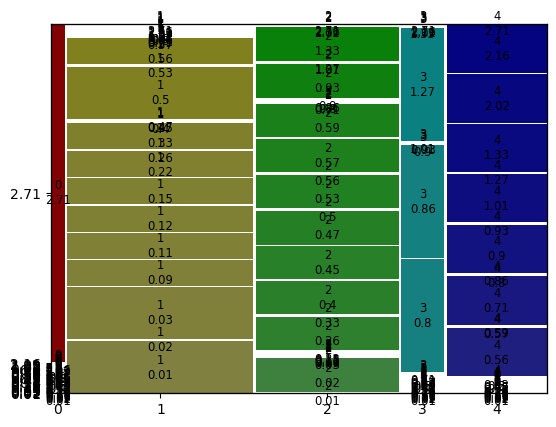

In [23]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
mosaic(pd.crosstab(cluster,df["Proportion of Electric Vehicle"]).stack())
plt.show()

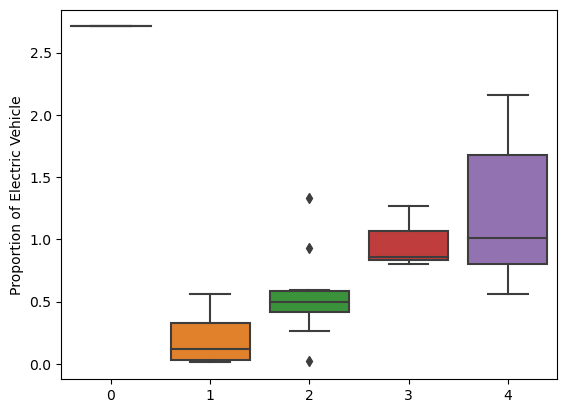

In [24]:
sns.boxplot(x=cluster, y=df["Proportion of Electric Vehicle"])
plt.show()

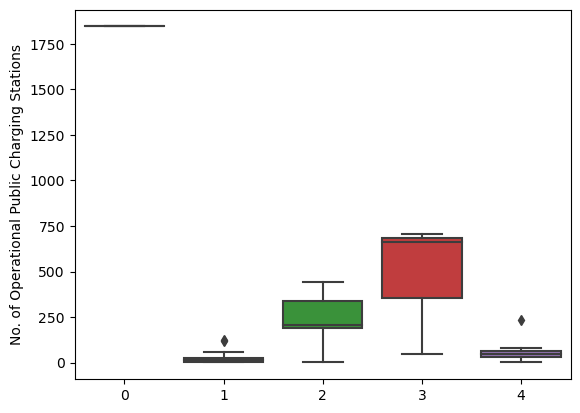

In [25]:
sns.boxplot(x=cluster,y=df["No. of Operational Public Charging Stations"])
plt.show() 

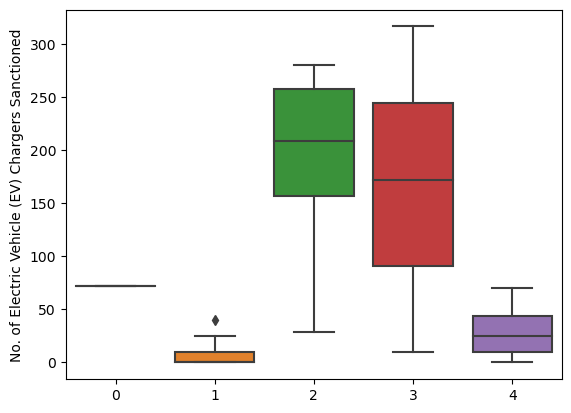

In [26]:
sns.boxplot(x=cluster,y=df["No. of Electric Vehicle (EV) Chargers Sanctioned"])
plt.show()

### Selecting Target Segments

In [27]:
prop_mean = df.groupby('cluster')["Proportion of Electric Vehicle"].mean()
prop_mean = prop_mean.to_frame().reset_index()
prop_mean

,cluster,Proportion of Electric Vehicle
0,0,2.710000
1,1,0.204615
2,2,0.555000
3,3,0.976667
4,4,1.241429


In [28]:
Operational_PCS_mean = df.groupby('cluster')["No. of Operational Public Charging Stations"].mean()
Operational_PCS_mean = Operational_PCS_mean.to_frame().reset_index()
Operational_PCS_mean

,cluster,No. of Operational Public Charging Stations
0,0,1845.000000
1,1,31.769231
2,2,243.900000
3,3,470.666667
4,4,68.142857


In [29]:
Sanctioned_PCS_mean = df.groupby('cluster')["No. of Electric Vehicle (EV) Chargers Sanctioned"].mean()
Sanctioned_PCS_mean = Sanctioned_PCS_mean.to_frame().reset_index()
Sanctioned_PCS_mean

,cluster,No. of Electric Vehicle (EV) Chargers Sanctioned
0,0,72.000000
1,1,8.692308
2,2,199.100000
3,3,166.333333
4,4,28.857143


In [30]:
segment = prop_mean.merge(Operational_PCS_mean, on='cluster', how='left').merge(Sanctioned_PCS_mean, on='cluster', how='left')
segment

,cluster,Proportion of Electric Vehicle,No. of Operational Public Charging Stations,No. of Electric Vehicle (EV) Chargers Sanctioned
0,0,2.710000,1845.000000,72.000000
1,1,0.204615,31.769231,8.692308
2,2,0.555000,243.900000,199.100000
3,3,0.976667,470.666667,166.333333
4,4,1.241429,68.142857,28.857143


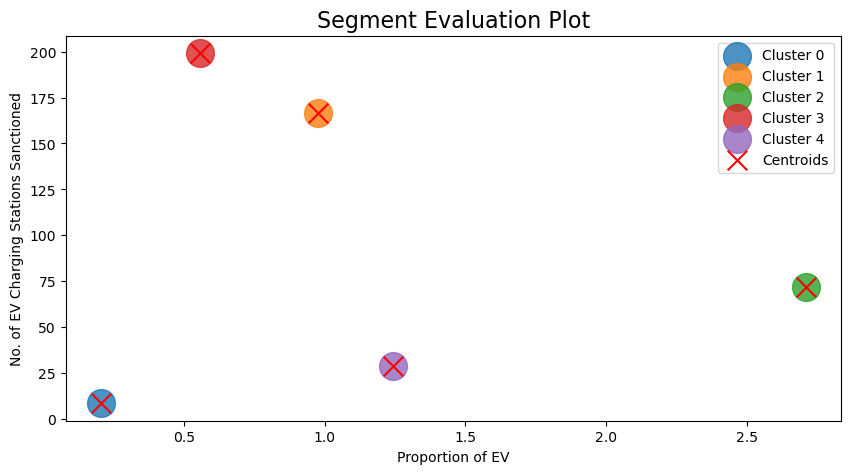

In [32]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(segment[['Proportion of Electric Vehicle', 'No. of Electric Vehicle (EV) Chargers Sanctioned']])

cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3','Cluster 4']

# Visualize the clustering results with labeled clusters
plt.figure(figsize=(10, 5))
for i in range(optimal_k):
    plt.scatter(segment.loc[kmeans.labels_ == i, 'Proportion of Electric Vehicle'], 
                segment.loc[kmeans.labels_ == i, 'No. of Electric Vehicle (EV) Chargers Sanctioned'], 
                label=cluster_labels[i], s=400, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.title("Segment Evaluation Plot", fontsize=16) 
plt.xlabel("Proportion of EV", fontsize=10) 
plt.ylabel("No. of EV Charging Stations Sanctioned", fontsize=10) 
plt.legend()
plt.show()

### Conclusion

- Segment 1 and Segment 3 are our target segments
- This are states in segment 1 - Andaman and Nicobar Island, Arunachal Pradesh, Himachal Pradesh, Jammu and Kashmir, Jharkhand, Ladakh, Manipur, Meghalaya, Mizoram, Nagaland, Odisha, Puducherry, Dadra and Nagar Haveli and Daman and Diu.
- This are states in segment 3 - Karnataka, Maharashtra, Uttar Pradesh